# 题目
    假设你现在打算卖房子，想知道房子能卖多少钱？
    我们拥有房子面积、卧室数量 与 房子价格之间的对应数据： ex1data2.txt

## 1.导入数据

1.导入库

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

2.导入数据集

In [132]:
data = pd.read_csv('ex1data2.txt',names = ['size','bedrooms','price'])  #读取文件，指定列名
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [133]:
data.tail()

,size,bedrooms,price
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


3.特征归一化

由于房子面积和卧室数量的尺度相差很大，在提取特征向量之前需要先进行特征归一化（具体原因见 特征缩放）
                     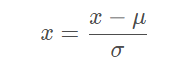

In [134]:
def normalize_feature(data):                      #将特征归一化
    return (data - data.mean()) / data.std()     #data.mean()为均值，data.std()为方差

In [135]:
data = normalize_feature(data)
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [136]:
data.tail()

,size,bedrooms,price
42,0.712618,1.090417,-0.211234
43,-1.007523,-0.223675,-0.331196
44,-1.445423,-1.537767,-1.283692
45,-0.187090,1.090417,-0.323998
46,-1.003748,-0.223675,-0.807044


可见归一化后的特征大部分都分布在[-1,1]之间。

4.数据可视化(注意新版的matplotlib和老板的有点不一样)

<IPython.core.display.Javascript object>


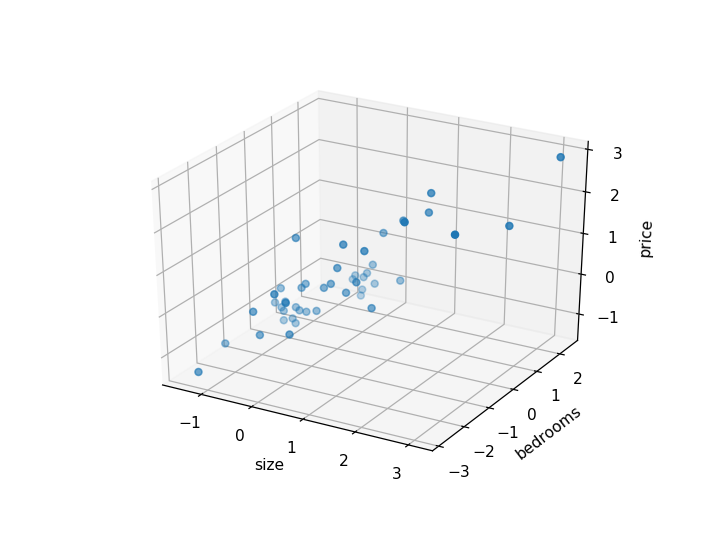

In [137]:
# 获取坐标分布
X1 = data.iloc[:,0:1]
X2 = data.iloc[:,1:2]
Y= data.iloc[:,-1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')              # 创建三维坐标
ax.scatter(X1,X2,Y)                                     # 散点图 
ax.set(xlabel='size',ylabel='bedrooms',zlabel='price')  # 坐标轴
plt.show()

## 2.构造数据集

In [138]:
# 添加 x_0=1这一列
data.insert(0,'$x_0$',1)

In [139]:
# 通过切片操作获取输入向量和输出向量
cols = data.shape[1] 
X = data.iloc[:,0:cols-1] 
y = data.iloc[:,cols-1:cols] 

In [140]:
# 将dataframe转成数组
X = X.values
y = y.values

可以用 X.shape 和 y.shape 查看数组的维度 ，维度分别为（47, 3）和（47, 1）

In [141]:
X.shape     #特征矩阵

(47, 3)

In [142]:
y.shape     #标签矩阵

(47, 1)

## 3.代价函数

In [143]:
#定义代价函数
def costFunction(X, y, theta):
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X)) 

theta = np.zeros((3,1)) #注意theta的维度变化 

## 4.梯度下降函数

1.定义梯度下降算法

In [144]:
def gradientDescent(X,y,theta,alpha,iters,isprint=False):
    costs = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta - y) ) * alpha / len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
    if i % 100 == 0:
            if isprint:
                print(cost)
                
    return theta,costs

2.画出不同学习率下梯度下降的效果

<IPython.core.display.Javascript object>


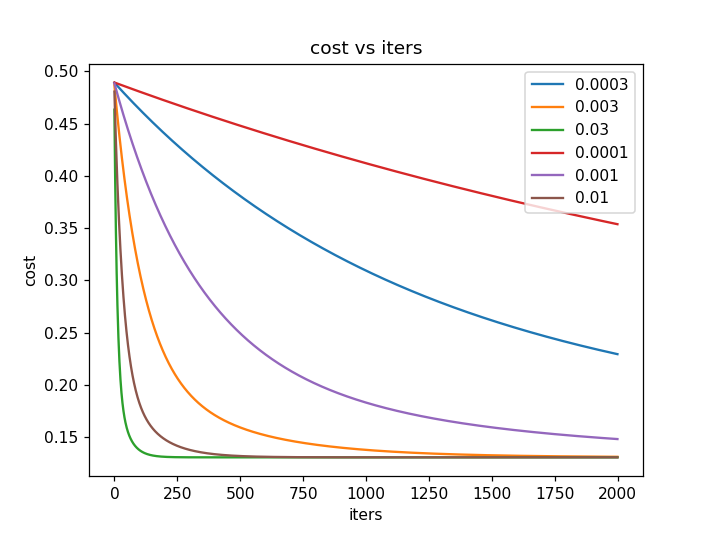

In [145]:
candidate_alpha = [0.0003,0.003,0.03,0.0001,0.001,0.01]   #步长为10倍
iters = 2000                                              #迭代次数为2000次
fig,ax = plt.subplots()
    
for alpha in candidate_alpha:
    _,costs = gradientDescent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label = alpha)
    ax.legend()

ax.set(xlabel='iters',ylabel='cost',title='cost vs iters')
plt.show()

## 5.拟合平面可视化

由于有两个变量，最终的拟合结果是三维空间中的一个平面。

1.以alpha=0.003 ，iters=2000为例，就能得到迭代结束后的最终参数theta_final，并得到拟合平面：
                     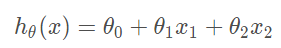

2.将拟合平面与原始散点数据放在同一个三维坐标系中：

In [146]:
alpha=0.01
iters=2000
theta,costs = gradientDescent(X,y,theta,alpha,iters)

<IPython.core.display.Javascript object>


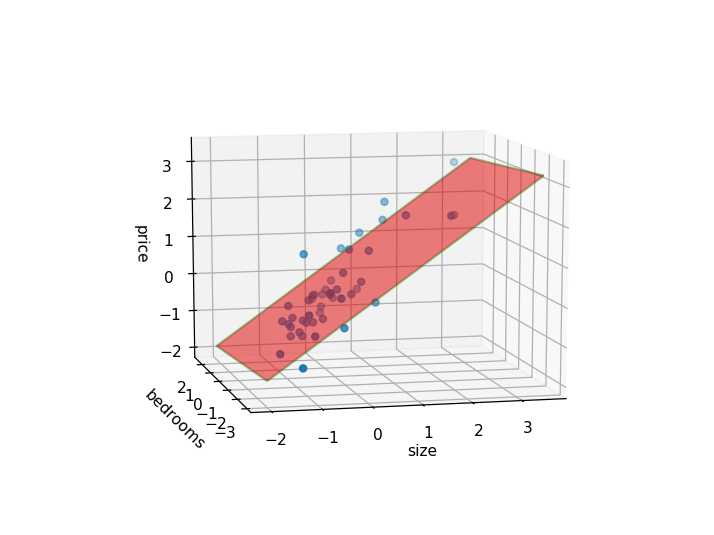

In [147]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')    #创建三维坐标

#绘制原始数据的散点图
ax.scatter(X1,X2,Y)

# 绘制拟合平面
x1, x2 = np.meshgrid(np.linspace(-2,3.5,2), np.linspace(-3,2.5,2))  #生成网格采样点，这一步很重要
h_x = theta[0,0] + theta[1,0] * x1 + theta[2,0] * x2 
ax.plot_wireframe(x1,x2,h_x,color='g',alpha = 0.4)                  #绘制线框 alpha表示透明度
ax.plot_surface(x1,x2,h_x,color='r',alpha = 0.5)                    #绘制平面

ax.set(xlabel='size',ylabel='bedrooms',zlabel='price')              #坐标轴

plt.show()